In [1]:
import json
f = open('/home/erfan/Desktop/University/95-summer/network-science/notebook/datas/blogs-without-pap.json', 'r')
strD = f.read()

graph = json.loads(strD)

In [30]:
len(graph)
sum(map(lambda x: len(x), graph.values()))

42743

In [3]:
graph_in = {}
for key, neighbours in graph.items():
    for neighbour in neighbours:
        if neighbour in graph_in:
            graph_in[neighbour].append(int(key))
        else:
            graph_in[neighbour] = [int(key)]

In [4]:
degrees = [0] * len(graph)
count = 0
for key, node in graph.items():
    degrees[count] = len(node) + 1
    count += 1

In [5]:
sum(map(lambda x: x * x, degrees)) / len(degrees)

54.1009972299169

In [6]:
degrees_in = [0] * len(graph_in)
count = 0
for key, node in graph_in.items():
    degrees_in[count] = len(node) + 1
    count += 1

In [7]:
sum(map(lambda x: x * x, degrees_in)) / len(degrees_in)

205.8463181448332

3.49 27


[[<matplotlib.lines.Line2D at 0x7ff4162a2f28>],

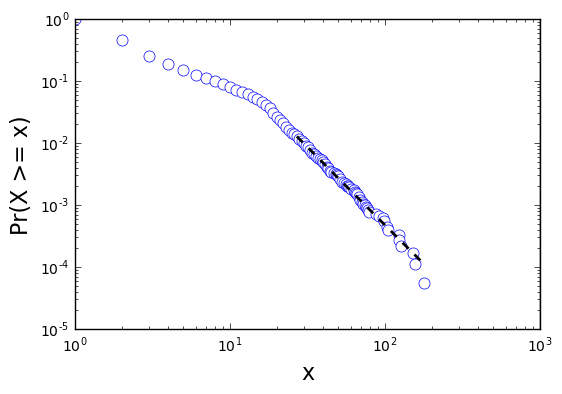

In [8]:
from plfit.plfit import plfit
from plfit.plplot import plplot
[alpha, xmin, L] = plfit(degrees)
print(alpha, xmin)
plplot(degrees,xmin,alpha)

[[<matplotlib.lines.Line2D at 0x7ff415e27e10>],

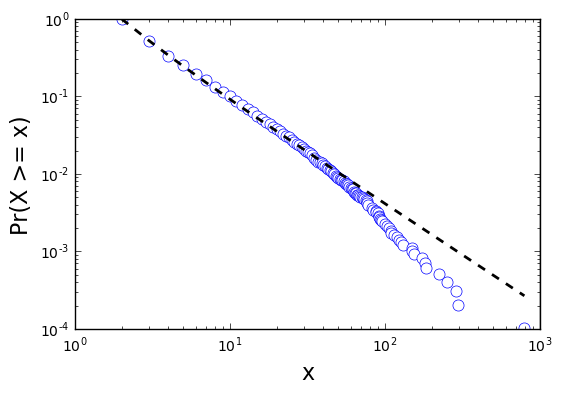

In [9]:
[alpha_in, xmin_in, L_in] = plfit(degrees_in)
plplot(degrees_in,xmin_in,alpha_in)

In [10]:
print(alpha, xmin, L)
print(alpha_in, xmin_in, L_in)

3.49 27 -866.7215922888977
2.32 2 -19372.048800703888


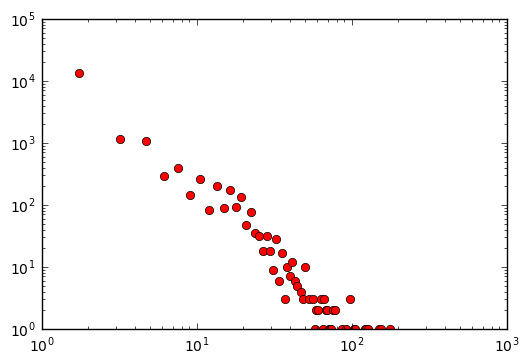

In [29]:
import matplotlib.pyplot as plt
import numpy
from math import pow
h = plt.hist(degrees, bins=120)
histY = h[0]
histXo = h[1]
histX = [0] * (len(histXo) - 1)
for i in range(0,len(histX)):
    histX[i] = (histXo[i] + histXo[i + 1]) / 2

plt.clf()
histPow = list(map(lambda x: pow(x, -alpha), histX))
# histY = list(map(lambda x: x / len(graph) / 1000, histY))
plt.loglog(histX, histY, 'ro')
# plt.loglog(histX, histPow, 'b-')
plt.show()

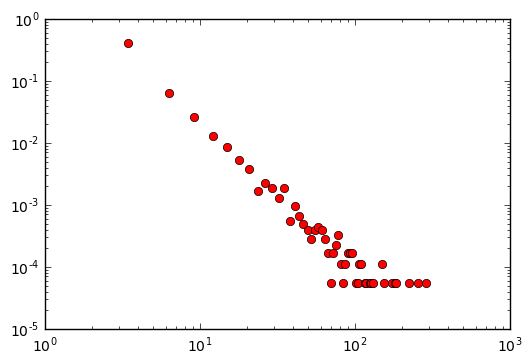

In [28]:
degrees_in = sorted(degrees_in)
h = plt.hist(degrees_in[0:-2], bins=100)
histY = h[0]
histXo = h[1]
histX = [0] * (len(histXo) - 1)
for i in range(0,len(histX)):
    histX[i] = (histXo[i] + histXo[i + 1]) / 2

plt.clf()
# histPow = list(map(lambda x: pow(x, -alpha) * 10000, histX))
histY = list(map(lambda x: x / len(graph), histY))
plt.loglog(histX, histY, 'ro')
# plt.loglog(histX, histPow, 'b-')
plt.show()

In [13]:
coef = {}
degree = {}
counts = {}
for key, neighbours in graph.items():
    count = 0
    addj = {}
    for neighbour in neighbours:
        addj[neighbour] = True
    for neighbour in neighbours:
        for nn in graph[neighbour]:
            if nn in addj:
                count += 1
    try:
        coef[key] = 1.0 * count / (len(neighbours) ** 2)
    except ZeroDivisionError:
        coef[key] = 0
    counts[key] = count
    degree[key] = len(neighbours)

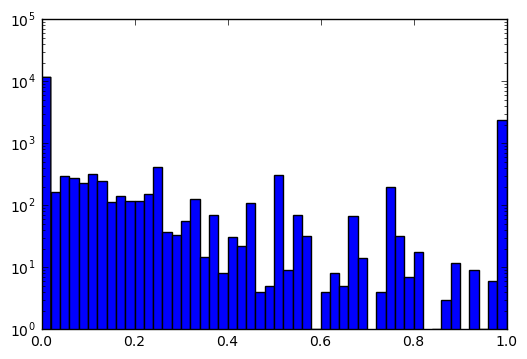

In [14]:
plt.hist(list(coef.values()), bins=50, log=True)
plt.show()

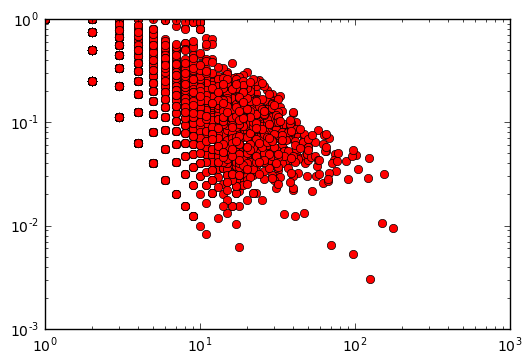

In [15]:
plt.loglog(list(degree.values()), list(coef.values()), 'ro')
plt.show()

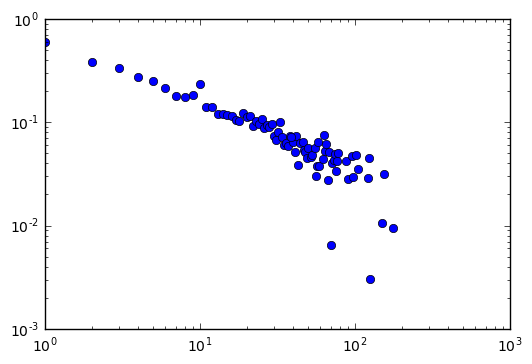

In [16]:
coef_sum = {}
coef_count = {}
for key in coef:
    if degree[key] not in coef_sum:
        coef_sum[degree[key]] = 0
        coef_count[degree[key]] = 0
    coef_sum[degree[key]] += coef[key]
    coef_count[degree[key]] += 1

coef_mean = {}
for key in coef_sum:
    coef_mean[key] = coef_sum[key] / coef_count[key]

plt.loglog(list(coef_mean.keys()), list(coef_mean.values()), 'bo')
plt.show()

In [17]:
from collections import deque

def BFS(graph, source):
    if source not in graph:
        return
    d = deque()
    dist = {}
    d.append(source)
    dist[source] = 0
    while len(d) > 0:
        x = d.popleft()
        for n in graph[x]:
            if n not in dist:
                d.append(n)
                dist[n] = dist[x] + 1
    return dist

In [18]:
distances = []
count = 0
for node, neighbours in graph.items():
    if count % 1000 == 0:
        print(count)
    count += 1
    dist = BFS(graph, node)
    distances.extend(list(dist.values()))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000


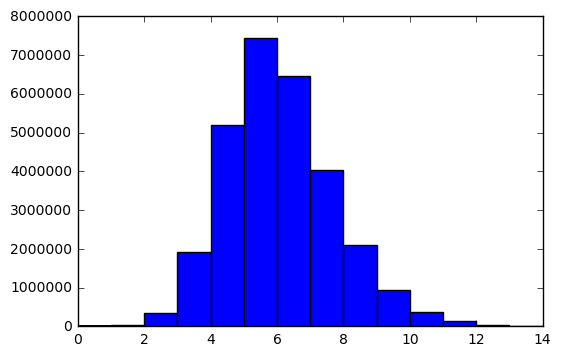

In [19]:
plt.hist(distances, bins=range(0,15))
plt.show()

In [24]:
graphnd = {}
for key, neighbours in graph.items():
    for neighbour in neighbours:
        if key in graphnd:
            if neighbour not in graphnd[key]:
                graphnd[key].append(neighbour)
        else:
            graphnd[key] = [neighbour]
            
        if neighbour in graphnd:
            if key not in graphnd[neighbour]:
                graphnd[neighbour].append(key)
        else:
            graphnd[neighbour] = [key]

In [25]:
cliques = []
cliques.append([])
count = 0
for key, neighbours in graphnd.items():
    if count % 1000 == 0:
        print(count)
    count += 1
    new_cliques = []
    for clique in cliques:
        is_adj = True
        for node in clique:
            if node not in neighbours:
                is_adj = False
        if is_adj:
            new_cliques.append(clique + [key])
    cliques.extend(new_cliques)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [26]:
cliques_len = list(map(lambda x: len(x), cliques))
max(cliques_len)

10

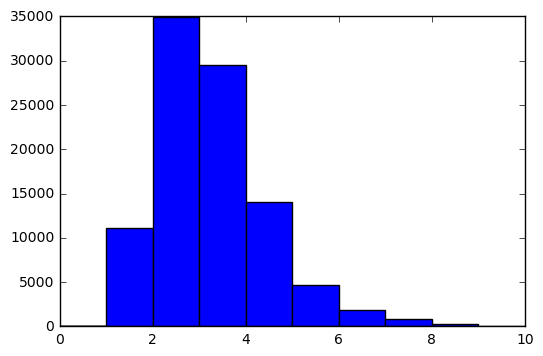

In [27]:
plt.hist(cliques_len)
plt.show()

In [37]:
for clique in cliques:
    if len(clique) >= 7:
        print(clique)

[52, 141, 247, 286, 316, 495, 667]
[706, 1128, 2044, 2617, 2618, 2619, 2620]
[1123, 4078, 4079, 4081, 4082, 4083, 4084]
[1536, 1538, 1539, 2835, 3836, 3977, 4902]
[1536, 1538, 1539, 2835, 3836, 3977, 5387]
[1853, 1855, 1858, 4365, 4366, 5005, 5601]
[2491, 4160, 6347, 6582, 6584, 6589, 6592]
[46, 47, 54, 146, 149, 300, 7856]
[3195, 3699, 4808, 7031, 7035, 7514, 8476]
[555, 5381, 6422, 7028, 9321, 9322, 9323]
[555, 6422, 7028, 9319, 9321, 9322, 9323]
[2491, 4160, 6347, 6582, 6584, 6589, 9334]
[2491, 4160, 6347, 6582, 6584, 6592, 9334]
[2491, 4160, 6347, 6582, 6587, 6592, 9334]
[2491, 4160, 6347, 6582, 6589, 6592, 9334]
[2491, 4160, 6347, 6584, 6589, 6592, 9334]
[2491, 4160, 6582, 6584, 6589, 6592, 9334]
[2491, 4263, 6582, 6584, 6589, 6592, 9334]
[2491, 6347, 6582, 6584, 6589, 6592, 9334]
[4160, 6347, 6582, 6584, 6589, 6592, 9334]
[2491, 4160, 6347, 6582, 6584, 6589, 6592, 9334]
[4275, 4283, 6514, 6789, 7940, 7946, 9799]
[555, 5381, 6422, 7028, 9321, 9322, 10343]
[555, 6422, 7028, 9319, 9

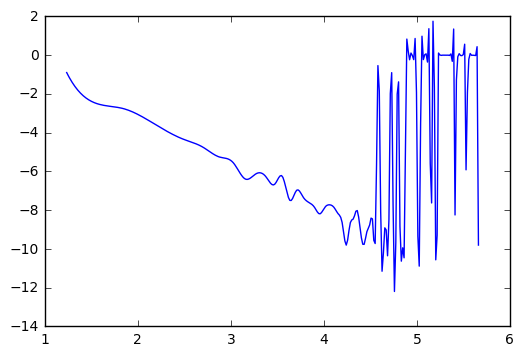

In [57]:
from scipy.interpolate import spline
import math
for i in range(0, len(histX)):
    try:
        histX[i] = math.log(histX[i])
    except:
        histX[i] = 0
    try:
        histY[i] = math.log(histY[i])
    except:
        histY[i] = 0

xnew = numpy.linspace(min(histX),max(histX),300)

y_smooth = spline(histX,histY,xnew)

plt.plot(xnew,y_smooth)
plt.show()